In [1]:
import numpy as np
import pandas as pd
import keras
import matplotlib.pyplot as plt
from sklearn.preprocessing import label_binarize

Using TensorFlow backend.


In [2]:
from keras.datasets import mnist
# Load pre-shuffled MNIST data into train and test sets
(X_train, y_train), (X_test, y_test) = mnist.load_data()

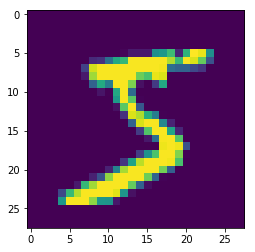

In [3]:
plt.imshow(X_train[0])
plt.show()

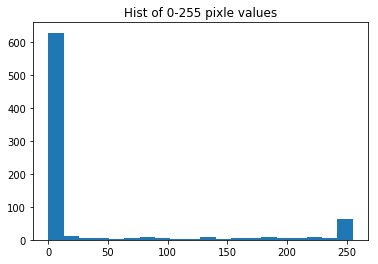

In [4]:
plt.hist(X_train[0].ravel(), bins = 20)
plt.title("Hist of 0-255 pixle values")
plt.show()

In [5]:
X_train[0].shape

(28, 28)

When using the Theano backend, you must explicitly declare a dimension for the depth of the input image. For example, a full-color image with all 3 RGB channels will have a depth of 3.

Our MNIST images only have a depth of 1, but we must explicitly declare that.

In other words, we want to transform our dataset from having shape (n, width, height) to (n, width, height, depth).

In [6]:
## training data
X_train = X_train.reshape(X_train.shape[0], 28, 28, 1)

## test data
X_test = X_test.reshape(X_test.shape[0], 28, 28, 1)

In [7]:
X_train.shape

(60000, 28, 28, 1)

The final preprocessing step for the input data is to convert our data type to float32 and normalize our data values to the range [0, 1].

In [8]:
X_train = X_train.astype('float32')
X_test = X_test.astype('float32')
X_train /= 255
X_test /= 255

In [9]:
np.unique(y_train, return_counts=True)

(array([0, 1, 2, 3, 4, 5, 6, 7, 8, 9], dtype=uint8),
 array([5923, 6742, 5958, 6131, 5842, 5421, 5918, 6265, 5851, 5949]))

In [10]:
classes = list(range(10))
Y_train = label_binarize(y=y_train, classes=classes)
Y_test = label_binarize(y=y_test, classes = classes)

In [11]:
Y_train.shape

(60000, 10)

## Build the Neural Net

In `Keras`, you can create a Sequential model by passing a list of layer instances to the constructor.


In [12]:
from keras import Sequential
from keras.layers import Dense, Dropout, Activation, Flatten, Convolution2D, MaxPooling2D
from keras.optimizers import SGD
from keras.models import model_from_json

In [13]:
model = Sequential()


In [14]:
model.add(Convolution2D(32, (3, 3), activation='relu', input_shape=(28,28, 1)))


In [15]:
model.output.shape

TensorShape([Dimension(None), Dimension(26), Dimension(26), Dimension(32)])

In [16]:
model.add(Convolution2D(32, (3, 3), activation='relu'))
model.add(MaxPooling2D(pool_size=(2,2)))
model.add(Dropout(0.25))

In [17]:
## fully connected dense layer
model.add(Flatten())
model.add(Dense(128, activation='tanh'))
model.add(Dropout(0.5))
model.add(Dense(10, activation='softmax'))

In [18]:
model.compile(loss='categorical_crossentropy',
              optimizer='adam',
              metrics=['accuracy'])

In [19]:
model.fit(X_train, Y_train, batch_size=32, epochs=20, verbose=1)

Epoch 1/20
60000/60000 [==============================] - 116s 2ms/step - loss: 0.1577 - acc: 0.9512
Epoch 2/20
60000/60000 [==============================] - 116s 2ms/step - loss: 0.0677 - acc: 0.9794
Epoch 3/20
60000/60000 [==============================] - 117s 2ms/step - loss: 0.0536 - acc: 0.9832
Epoch 4/20
60000/60000 [==============================] - 118s 2ms/step - loss: 0.0469 - acc: 0.9852
Epoch 5/20
60000/60000 [==============================] - 119s 2ms/step - loss: 0.0403 - acc: 0.9875
Epoch 6/20
60000/60000 [==============================] - 123s 2ms/step - loss: 0.0348 - acc: 0.9893
Epoch 7/20
60000/60000 [==============================] - 120s 2ms/step - loss: 0.0320 - acc: 0.9900
Epoch 8/20
60000/60000 [==============================] - 122s 2ms/step - loss: 0.0283 - acc: 0.9912
Epoch 9/20
60000/60000 [==============================] - 123s 2ms/step - loss: 0.0264 - acc: 0.9914
Epoch 10/20
60000/60000 [==============================] - 124s 2ms/step - loss: 0.0257 - a

In [25]:
# evaluate the model
scores = model.evaluate(X_test, Y_test, verbose=1)

10000/10000 [==============================] - 5s 470us/step


In [26]:
#X_test.shape

In [27]:
print("%s: %.2f%%" % (model.metrics_names[1], scores[1]*100))

acc: 99.02%


# Save the model

In [23]:
# serialize model to JSON
model_json = model.to_json()
with open("/home/jonathan/Documents/model.json", "w+") as json_file:
    json_file.write(model_json)
# serialize weights to HDF5
#model.save_weights("model.h5")
#print("Saved model to disk")
 
# later...

#print("%s: %.2f%%" % (loaded_model.metrics_names[1], score[1]*100))

In [24]:
 
# load json and create model
json_file = open('/home/jonathan/Documents/model.json', 'r')
loaded_model_json = json_file.read()
json_file.close()
loaded_model = model_from_json(loaded_model_json)
# load weights into new model
#loaded_model.load_weights("model.h5")
#print("Loaded model from disk")
 
# evaluate loaded model on test data
loaded_model.compile(loss='binary_crossentropy', optimizer='rmsprop', metrics=['accuracy'])
#score = loaded_model.evaluate(X, Y, verbose=0)

In [30]:
import pandas as pd

In [42]:
eval_data=pd.read_csv('../data/Digits/train.csv')


In [46]:
X_eval = eval_data.iloc[:, 1:].values

In [47]:
X_eval = X_eval.reshape(X_eval.shape[0], 28, 28, 1)

In [49]:
Y_eval = label_binarize(y=eval_data.label, classes = classes)

In [51]:
Y_eval.shape

(42000, 10)

In [52]:
scores = model.evaluate(X_eval, Y_eval, verbose=1)

42000/42000 [==============================] - 20s 479us/step


In [53]:
scores

[0.019026911336428729, 0.99447619047619051]

In [63]:
eval_data=pd.read_csv('../data/Digits/test.csv')

In [64]:
X_eval = eval_data.values

In [65]:
X_eval = X_eval.reshape(X_eval.shape[0], 28, 28, 1)

In [69]:
results=model.predict_classes(x = X_eval, verbose=1)

28000/28000 [==============================] - 14s 491us/step


In [70]:
df = pd.DataFrame(results)
df.index+=1

In [71]:
df.reset_index(drop=False, inplace=True)

In [72]:
df.columns=['ImageId', 'Label']
df.head()

,ImageId,Label
0,1,2
1,2,0
2,3,9
3,4,9
4,5,3


In [73]:
df.to_csv('/home/jonathan/Documents/results.csv', header=True, index=False)